In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1 Filtered Samples & Genotyping data

In [2]:
dataset=pd.read_csv('samples_SNP_filtered.csv',index_col=[0])
dataset.head()

,ss715578788,ss715578818,ss715578923,ss715578960,ss715579193,ss715579265,ss715579576,ss715579942,ss715580755,ss715580822,...,ss715608834,ss715608835,ss715608836,ss715603654,ss715584705,ss715639176,ss715586962,ss715623959,ss715584606,ss715633065
PI86046,2,2,2,0,0,0,2,0,2,2,...,0,0,0,0,2,2,2,0,0,0
PI90208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,0,2,0
PI253651A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,0,2,0
PI347550A,0,0,0,0,0,0,0,0,-2,0,...,0,0,0,0,2,2,2,2,2,2
PI398807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,0,2,0


In [21]:
# create list of GENames for hierarchial clustering
GENames=pd.DataFrame({'GENames':dataset.index})
GENames.reset_index().head()

,index,GENames
0,0,PI86046
1,1,PI90208
2,2,PI253651A
3,3,PI347550A
4,4,PI398807


In [26]:
# get the list of GENames index for using in hierarchial clustering
GENames_list=list(GENames.index)
GENames_list[-5:]

[19391, 19392, 19393, 19394, 19395]

In [4]:
dataset.shape

(19396, 36729)

# 2. ML modelling

# 2.1 KMeans Clustering
    - Finds clusters of samples; # of clusters needs to be specified
    - Dataset to nparray

In [5]:
# 2.1.1 Convert DataFrame to 2D matrix/nympy array
mat = dataset.values
mat

array([[2, 2, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0]], dtype=int64)

# 2.1.2 Choose a good number of clusters for this dataset using the k-means inertia graph

### Inertia measures clustering quality and measures how spread out the clusters are (lower inertia is better) or how far the sample is from centroid; 
#### Determine How many clusters the dataset is spread across using atribute, model.inertia_ 

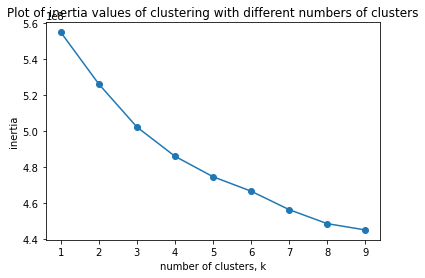

In [6]:
ks=range(1,10)
inertias=[]

for k in ks:
    # create KMeans instance with a parameter of n_clusters
    model=KMeans(n_clusters=k)
    # fit model to matrix
    model.fit(mat)
    # append inertia to list of inertias
    inertias.append(model.inertia_)

# plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('Plot of inertia values of clustering with different numbers of clusters')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

####### From the scatter plot, we see that the data seem to separate into 5 clusters

## Summary:Plot of inertia values of clustering of dataset with different numbers of clusters. K means model with 5 clusters had relatively low inertia, which is great. But, notice that indertia continuous to decrease slowly. So, what's the best number of clusters to choose? 
#### A good clustering has tight clusters (low inertia) but also doesn't have too many clusters. A good rule of thumb is to choose an 'elbow' in the inertia plot i.e the a  point with inertia begins to decrease more slowly. So, 3 is a good number of clusters to soy 50k dataset.

Result: The inertia decreases very slowly from 5 clusters to 6, so it looks like 5 clusters would be a good choice for this dataset.

## Evaluating the clustering

In [7]:
# create a KMeans model with 5 clusters
model = KMeans(n_clusters=5)

# use fit_predict to fit model and obtain cluster labels
labels = model.fit_predict(mat)
print(labels)

[4 0 2 ... 1 0 2]


In [8]:
# Which cluster each GE belongs to; Where is the center of each cluster is
labels = model.labels_  # generates a NumPy array with predictions of cluster/GE
# where the center of each cluster lies
centers = model.cluster_centers_   # generates a two-dimensional NumPy array that contains the coordinates of each clusters center
print(centers)


[[ 0.37900701  0.34232891  0.39272402 ...  0.04115104  1.88370359
   0.01252423]
 [ 0.18185022  0.14555066  0.18079295 ...  0.57797357  1.33709251
   0.63647577]
 [ 0.80335731  0.78609113  0.83021583 ...  0.54292566  1.241247
   0.06426859]
 [ 0.34476534  0.28880866  1.66787004 ...  0.09927798  0.66967509
  -1.52166065]
 [ 1.05990783  0.99539171  1.15668203 ...  0.81336406  0.59907834
   0.1843318 ]]


In [9]:
# Cross tabulation with Pandas library: Format results as a DataFrame
results = pd.DataFrame({'GEName':dataset.index,'label':labels})
results.head()

,GEName,label
0,PI86046,4
1,PI90208,0
2,PI253651A,2
3,PI347550A,1
4,PI398807,0


In [10]:
# Create crosstab of labels and GENames: ct
ct = pd.crosstab(results['label'],results['GEName'])
# Display ct
print(ct)

GEName  AC-2001  AC-Albatros  AC-Brant  AC-Bravor  AC-Cormoran  AC-Harmony  \
label                                                                        
0             0            0         0          0            1           0   
1             1            1         1          1            0           1   
2             0            0         0          0            0           0   
3             0            0         0          0            0           0   
4             0            0         0          0            0           0   

GEName  AC-Orford  AYR  Accord  Alta  ...  RCH-Bobcat  S05N12406  S05N12741  \
label                                 ...                                     
0               0    0       0     0  ...           0          0          0   
1               1    1       1     1  ...           1          1          1   
2               0    0       0     0  ...           0          0          0   
3               0    0       0     0  ...           0     

# Result: The cross tabulation shows that the samples separate really well into ## clusters. But dependig on the type of data you are working with, the clustering may not always be this good.
# Is there anything you can do in such situations to imporve your clustering?

In [11]:
# Visualizing the Accuracy of Our Model

In [12]:
## Plot All K-Means Clusters

In [13]:
#Getting unique labels
import numpy as np
 
u_labels = np.unique(labels)
#print(u_labels)

#plotting the results:
 
for i in u_labels:
    #print(i)
    plt.scatter(results[label == i , 0] , results[label == i , 1] , label = i)
plt.legend()
plt.show()

NameError: name 'label' is not defined

# Transforming features for better clusterings

Transform features, inorder to have equal variance; so gives opportunity for each feature/SNP in this case in KMeans clustering
    1) StandardScaler: transforms each fea to have mean 0, variance 1
    2) Normalizer: rescales each sample - Eg: each company's stock price,  independently of the other.
    3) MaxAbsScaler

### Clustering GE's in 2 steps: StandardScaler (to standarise data) and Kmeans (cluster standardized data)

standardize/scaling data (StandardScaler) and then cluster isong KMeans
- standard scaler use fit()/ transform()
- KMenas use          fit()/ predict()

In [27]:
## build a pipeline to standardize (StandardScaler) and cluster (KMeans) the data; so data flows from standardization step to clusering step automatically

# Perform the necessary imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# step1: Create standard scaler and KMeans objects
scaler = StandardScaler()
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=5)

# step2: Apply make_pipeline to scaler and kmeans objects
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples matrix
pipeline.fit(mat)

# use predict method to get cluster labels
labels = pipeline.predict(mat)
print(labels)


[3 0 3 ... 1 0 3]


In [28]:
# Check if feature standardization improved clustering?
# Format results as a DataFrame
results_scaler = pd.DataFrame({'GEName':dataset.index,'Cluster':labels})
results_scaler.head()

,GEName,Cluster
0,PI86046,3
1,PI90208,0
2,PI253651A,3
3,PI347550A,2
4,PI398807,0


In [29]:
# Create crosstab: ct
ct = pd.crosstab(results_scaler['Cluster'],results_scaler['GEName'])
# Display ct
print(ct)

GEName   AC-2001  AC-Albatros  AC-Brant  AC-Bravor  AC-Cormoran  AC-Harmony  \
Cluster                                                                       
0              0            0         0          0            0           0   
1              1            0         0          0            0           1   
2              0            1         1          1            1           0   
3              0            0         0          0            0           0   
4              0            0         0          0            0           0   

GEName   AC-Orford  AYR  Accord  Alta  ...  RCH-Bobcat  S05N12406  S05N12741  \
Cluster                                ...                                     
0                0    0       0     0  ...           0          0          0   
1                0    0       0     0  ...           1          1          1   
2                1    1       1     1  ...           0          0          0   
3                0    0       0     0  ...    

# Is Standard Scler improved clustering of GE's?

In [30]:
clusters=pd.merge(results,results_scaler, on='GEName')
clusters.head()

,GEName,label,Cluster
0,PI86046,4,3
1,PI90208,0,0
2,PI253651A,2,3
3,PI347550A,1,2
4,PI398807,0,0


In [31]:
clusters['label'].equals(clusters['Cluster'])

False

## Summary: The cluster labels generated with Kmeans with and without StandardScaler is same. 

In [ ]:
### standardize/scaling data (Normalizer) and then cluser

In [32]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
# Create a normalizer: normalizer
normalizer = Normalizer()
# Create a KMeans model with 5 clusters: kmeans
kmeans = KMeans(n_clusters=5)
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to the data
pipeline.fit(mat)

###  use the standardization and clustering pipeline to cluster
# Import pandas
import pandas as pd
# Predict the cluster labels: labels
labels = pipeline.predict(mat)
print(labels)

[2 3 0 ... 4 3 0]


In [33]:
# Format results as a DataFrame
results_normalizer = pd.DataFrame({'GEName':dataset.index,'Cluster_normal':labels})
results_normalizer.head()

,GEName,Cluster_normal
0,PI86046,2
1,PI90208,3
2,PI253651A,0
3,PI347550A,4
4,PI398807,3


In [34]:
# Display df sorted by cluster label
print(results_normalizer.sort_values('Cluster_normal'))

          GEName  Cluster_normal
19395   PI587906               0
14912  PI587846B               0
14913  PI587992C               0
14914  PI594767A               0
14915  PI605810A               0
...          ...             ...
4944    PI438022               4
4943    PI437829               4
10206  PI437129B               4
3709   PI567512A               4
12710   PI548690               4

[19396 rows x 2 columns]


In [35]:
transform_clusters=pd.merge(clusters,results_normalizer, on='GEName')
transform_clusters.head()

,GEName,label,Cluster,Cluster_normal
0,PI86046,4,3,2
1,PI90208,0,0,3
2,PI253651A,2,3,0
3,PI347550A,1,2,4
4,PI398807,0,0,3


In [39]:
transform_clusters.to_csv('KMeans_scaler_normalizer_clusters_result.csv')

In [36]:
transform_clusters['label'].equals(transform_clusters['Cluster'])

False

In [37]:
transform_clusters['label'].equals(transform_clusters['Cluster_normal'])

False

### Summary: The cluster labels generated with Kmeans, with and without StandardScaler/Normalizer are not same, cluster number changed each time. But, same GE's clustered together.

# Visualizing hierarchies (t-SNE, hierarchial clustering/Dendrogram)

t-SNE creates 2D map of any dataset, conveys proximity of samples with one another
hierarchial clustering arranges samples into hierarchy of clusters

Input Dataset: 2D array
SciPy linkage() function performs hierarchical clusters on array of samples

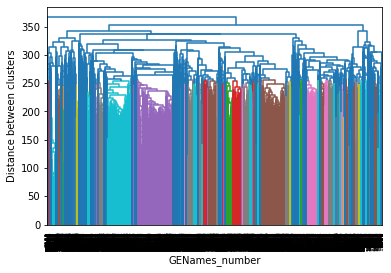

In [38]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(mat, method='complete') # mat is 2D array of dataset

# Plot the dendrogram, using list of GENames as labels
dendrogram(mergings, labels= GENames_list, leaf_rotation=90,leaf_font_size=6)
plt.xlabel('GENames_number')
plt.ylabel('Distance between clusters')
plt.show()

In [ ]:
# Result: Dendrograms are a great way to illustrate the arragement of the clusters produced by hierarchial clustering

## SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer

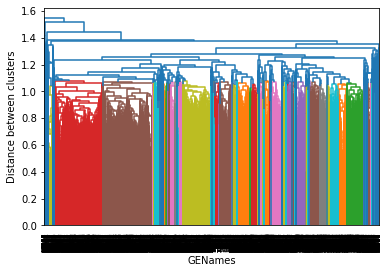

In [40]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the genotyping calls: normalized_geno
normalized_geno = normalize(mat)

# Calculate the linkage: mergings
mergings = linkage(normalized_geno, method='complete')

# Plot the dendrogram for list of GE's using labels
dendrogram(mergings, labels=GENames_list, leaf_rotation=90, leaf_font_size=6)
plt.xlabel('GENames')
plt.ylabel('Distance between clusters')
plt.show()


## cluster labelling

In [43]:
# choose height of clusters i.e distance between clusters measured by 'linkage method'

# Extract cluster labels using fcluster function

from scipy.cluster.hierarchy import linkage
mergings = linkage(mat, method='complete')
from scipy.cluster.hierarchy import fcluster
labels=fcluster(mergings, 15, criterion='distance') # specify height of 15
print(labels) # returns numpy array with cluster labels of all GE"s

[13366  3669 14667 ...  8016  5358  9670]


In [46]:
## Inspect cluster lables with GENames
# Given a list of strings GENames
import pandas as pd
df=pd.DataFrame({'labels':labels, 'GENames':GENames_list})
print(df.sort_values('labels'))

       labels  GENames
12055       1    12055
12056       2    12056
11673       3    11673
19045       4    19045
2185        5     2185
...       ...      ...
3565    18504     3565
19123   18505    19123
2864    18506     2864
2934    18507     2934
2745    18508     2745

[19396 rows x 2 columns]


In [47]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['GENames'])

# Display ct
print(ct)

GENames  0      1      2      3      4      5      6      7      8      9      \
labels                                                                          
1            0      0      0      0      0      0      0      0      0      0   
2            0      0      0      0      0      0      0      0      0      0   
3            0      0      0      0      0      0      0      0      0      0   
4            0      0      0      0      0      0      0      0      0      0   
5            0      0      0      0      0      0      0      0      0      0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18504        0      0      0      0      0      0      0      0      0      0   
18505        0      0      0      0      0      0      0      0      0      0   
18506        0      0      0      0      0      0      0      0      0      0   
18507        0      0      0      0      0      0      0      0      0      0   
18508        0      0      0

In [ ]:
# Summary: 
Since this dataset doesn’t have labels, I implemented Unsupervised Learning (USL). USL is a class of machine learning technique used to find patterns in data instead of predicting target variable like in supervised learning. 
Grouping/clustering the genotypes/accessions based on similarity/patterns. I implemented KMeans clustering model from python’s sklearn library, partitions dataset into k clusters based on similarity in which each observation belongs to the cluster with nearest mean. 
•Converted dataframe to 2D numpy array before implementing KMeans algorithm.
•Plot of inertia values of clustering with different K values showed that K means model with 5 clusters had relatively low inertia, so it looks like 5 clusters would be a good choice for this dataset.
•Then, grouped accessions into 5 clusters and predicted the label/cluster for each line.
•Then, evaluated the clustering with cross tabulation. The cross tabulation shows that the samples separate really well into 5 clusters. But depending on the type of data you work with, the clustering may not always be this good.
•Is there anything you can do in such situations to improve your clustering? 
o	YES, to give every feature a chance, data needs to be transformed. So, all features will have equal variance during preprocessing. For example: StandardScaler: standardizes features by removing the mean and scaling to unit variance i.e transforms each feature to have mean 0, variance 1 and standardized features are very informative.  Normalizer: rescales each sample independently of the other 
In this dataset, I implemented clustering with KMeans and also used transformations like StandardScaler and Normalizer (n_clusters=5). 
•	The cluster labels generated with Kmeans, with and without StandardScaler/Normalizer, are different. However, same GENames were grouped together though the cluster label is different with transformations.

Also implemented Hierarchial clustering. 
•	SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so I used normalize() function from sklearn.preprocessing instead of Normalizer
Since there are 19,400 GENames/accessions to cluster, the hierarchical clustering seems clumsy. So, I exported the clusters and grouped them based on Species, Cultivar and Relative Maturity groups.

# Future work/Next Steps

# t-SNE for 2D maps (map samples to 2D space) 

## map aproximately preserves nearness of samples

### Iris dataset has 4 features, so it is 4 dimensional; t-SNE maps samples not dimensions, t-SNE didnt know there are different species. BUT, you can color code the species

Input: 2D numpy array of genotyping data (mat), list of cluster each GE belong to 1 to 5 from above

In [ ]:
## imput files mat
labels=list(df['labels'])


# Import TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Create a TSNE instance: model
model= TSNE(learning_rate=100)
# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(mat) # mat is numpy array of genotyping data
# Select the 0th feature: xs
xs = tsne_features[:.0]
# Select the 1st feature: ys
ys = tsne_features[:,1]
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=labels)
plt.show()

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(mat)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, GENames_list in zip(xs, ys, GENames):
    plt.annotate(GENames_list, (x, y), fontsize=5, alpha=0.75)
plt.show()


# Dimensionality Reduction

## PCA analysis done in 2 steps
1) Decorrelation (PCA rotates samples to align with coordinate axes, shifts samples so that they have mean 0)
2) Reduce dimension

- SKlearn implement PCA like KMeans, StandardScaler
- PCA follows fit/transform methods like StandardScaler; fit method learns how to shift/rotate samples; transform method applies transformation that fit learned (applied to new unseen samples)

Input: Array 